In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


#loading data 
file = "./GOT_character_predictions.xlsx"

GOT = pd.read_excel(io = file)



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


#displaying the head of the dataset 
GOT.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
# checking each feature for missing values
GOT.isnull().sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [3]:
for column in GOT: 
    if GOT[column].isnull().sum() > 0:
        GOT['m_' + column] =  GOT[column].isnull().astype(int)

In [4]:
GOT['title'].fillna(value = "unknown",
                      inplace = True)

GOT['culture'].fillna(value = 'unknown',
                      inplace = True)

median_dateofbirth = GOT['dateOfBirth'].median()
GOT['dateOfBirth'].fillna(value = median_dateofbirth,
                      inplace = True)

GOT['mother'].fillna(value = "unknown",
                      inplace = True)

GOT['father'].fillna(value = "unknown",
                      inplace = True)

GOT['heir'].fillna(value = "unknown",
                      inplace = True)

GOT['spouse'].fillna(value = "unknown",
                      inplace = True)

median_age = GOT['age'].median()
GOT['age'].fillna(value = median_age,
                      inplace = True)

GOT['isAliveMother'].fillna(value = 0,
                      inplace = True)

GOT['isAliveFather'].fillna(value = 0,
                      inplace = True)

GOT['isAliveHeir'].fillna(value = 0,
                      inplace = True)


GOT['isAliveSpouse'].fillna(value = 0,
                      inplace = True)

In [5]:
for column in GOT:
    print(column)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive
m_title
m_culture
m_dateOfBirth
m_mother
m_father
m_heir
m_house
m_spouse
m_isAliveMother
m_isAliveFather
m_isAliveHeir
m_isAliveSpouse
m_age


In [6]:
GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0


In [7]:
# Creating a text split for name column

GOT_new = GOT['name'].str.split(" ", n=1, expand = True)

GOT["First Name"] = GOT_new[0]
GOT["Last Name"] = GOT_new[1]

GOT.drop(columns = "Last Name", inplace=True)

GOT.head(n=5)


,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,First Name
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva


In [8]:
import gender_guesser.detector as gender

placeholder_lst = []


for index, col in GOT.iterrows():
    
    split_name = GOT.loc[index, "name"].split(sep = " ")
        
    placeholder_lst.append(split_name)
    
name_df = pd.DataFrame(placeholder_lst)

name_df

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
...,...,...,...,...,...,...
1941,Luwin,None,None,None,None,None
1942,Reek,None,None,None,None,None
1943,Symeon,Star-Eyes,None,None,None,None
1944,Coldhands,None,None,None,None,None


In [9]:
name_df.columns = ["first_name", "lastname1", "lastname2", "lastname3", "lastname4", "lastname5"]

GOT = pd.concat([GOT, name_df], axis = 1)

placeholder_lst = []

for name in GOT["first_name"]:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst.append(guess)
    
GOT["gender_guess"] = pd.Series(placeholder_lst)

unknown
unknown
andy
unknown
female
unknown
unknown
unknown
male
male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
unknown
male
unknown
unknown
male
male
female
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
mostly_female
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
male
male
andy
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
male
male
unknown
male
male
male
male
male
male
male
mostly_male
male
mostly_male
mostly_male
unknown
unknown
unknown
male
unknown
male
unknown
male
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
mostly_male
unknown
unknown
male


In [10]:
GOT.head(5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,First Name,first_name,lastname1,lastname2,lastname3,lastname4,lastname5,gender_guess
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,Viserys,II,Targaryen,None,None,None,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,Walder,Frey,None,None,None,None,unknown
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,Addison,Hill,None,None,None,None,andy
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,Aemma,Arryn,None,None,None,None,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,Sylva,Santagar,None,None,None,None,female


In [11]:
print(placeholder_lst)

['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'm

In [12]:
#getting dummie variables for gender guesser
GOT["gender_unknown"] = 0

for row, colum in GOT.iterrows():
    if GOT.loc[row, "gender_guess"] == "unknown" or GOT.loc[row, "gender_guess"] == "andy":
        GOT.loc[row, "gender_unknown"] = 0
    elif GOT.loc[row, "gender_guess"] == "unknown":
        GOT.loc[row, "gender_unknown"] = 1

GOT["gender_female"] = 0

for row, colum in GOT.iterrows():
    if GOT.loc[row, "gender_guess"] == "female" or GOT.loc[row, "gender_guess"] == "mostly_female":
        GOT.loc[row, "gender_female"] = 0
        
    elif GOT.loc[row, "gender_guess"] == "female" or GOT.loc[row, "gender_guess"] == "mostly_female":
        GOT.loc[index, "gender_female"] = 1

GOT["gender_male"] = 0

for row, colum in GOT.iterrows():
    if GOT.loc[row, "gender_guess"] == "male" or GOT.loc[row, "gender_guess"] == "mostly male":
        GOT.loc[row, "gender_male"] = 0
        
    elif GOT.loc[row, "gender_guess"] == "male" or GOT.loc[row, "gender_guess"] == "mostly_male":
        GOT.loc[row, "gender_male"] = 1

In [13]:
#getting dummies from house variable
GOT['House']=0

for row, col in GOT.iterrows():
    if GOT.loc[row,"lastname1"]=='Lannister' or GOT.loc[row,"lastname2"]=='Lannister':
        GOT.loc[row,'House']='Lannister'
        
    elif GOT.loc[row,"lastname1"]=="Baratheon" or GOT.loc[row,"lastname2"]=="Baratheon":
        GOT.loc[row,"House"]='Baratheon'
        
    elif GOT.loc[row,"lastname1"]=='Targaryen' or GOT.loc[row,'lastname2']=='Targaryen':
        GOT.loc[row,'House']='Targaryen'
    
    elif GOT.loc[row,"lastname1"]=='Stark' or GOT.loc[row,'lastname2']=='Stark':
        GOT.loc[row,'House']='Stark'
        
    elif GOT.loc[row,"lastname1"]=='Tyrell' or GOT.loc[row,'lastname2']=='Tyrell':
        GOT.loc[row,'House']='Tyrell'
        
    elif GOT.loc[row,"lastname1"]=='Frey' or GOT.loc[row,'lastname2']=='Frey':
        GOT.loc[row,'House']='Frey'
        
    elif GOT.loc[row,"lastname1"]=='Arryn' or GOT.loc[row,'lastname2']=='Arryn':
        GOT.loc[row,'House']='Arryn'
        
    elif GOT.loc[row,"lastname1"]=='Greyjoy' or GOT.loc[row,'lastname2']=='Greyjoy':
        GOT.loc[row,'House']='Greyjoy'
        
    else:
        GOT.loc[row,'House']='Other'
        

GOT['House'].head(n=5)

0    Targaryen
1         Frey
2        Other
3        Arryn
4        Other
Name: House, dtype: object

In [14]:
pip install gender-guesser

Note: you may need to restart the kernel to use updated packages.


In [15]:
GOT["dead_or_not"] = GOT.loc[:,['dateOfBirth','age']].sum(axis=1)

In [16]:
df_corr = GOT.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
dead_or_not                   0.31
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_mother                      0.14
m_heir                        0.13
m_isAliveHeir                 0.13
age                           0.05
m_isAliveSpouse               0.05
m_spouse                      0.05
m_title                       0.04
m_house                       0.04
m_culture                     0.04
book5_A_Dance_with_Dragons    0.03
gender_male                   0.01
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.01
isAliveFather                -0.04
isNoble                      -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother                -0.12
S.No                

In [17]:
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [18]:
# declaring explanatory variables
GOT_data   = GOT.drop('isAlive', axis = 1)


# declaring response variable
GOT_target = GOT.loc[ :  ,  'isAlive' ]

# Logistic Regression Model #

In [19]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [20]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """ isAlive ~ dead_or_not  """,
                           data      = GOT)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.496663
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.124     
Dependent Variable: isAlive          AIC:              1937.0120 
Date:               2021-12-05 13:42 BIC:              1948.1590 
No. Observations:   1946             Log-Likelihood:   -966.51   
Df Model:           1                LL-Null:          -1103.5   
Df Residuals:       1944             LLR p-value:      1.4678e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      -44.5875   5.6697 -7.8642 0.0000 -55.6999 -33.4752
dead_or_not      0.1548   0.0192  8.0687 0.0000   0.1172   0.1924
=================================================================

"""

In [21]:
for val in GOT_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 First Name + 
 first_name + 
 lastname1 + 
 lastname2 + 
 lastname3 + 
 lastname4 + 
 lastname5 + 
 gender_guess + 
 gender_unknown + 
 gender_female + 
 gender_male + 
 House + 
 dead_or_not + 


In [22]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ dead_or_not +
                                        popularity + 
                                        book3_A_Storm_Of_Swords + 
                                        book5_A_Dance_with_Dragons + 
                                        book4_A_Feast_For_Crows """, 
                                        data = GOT_train) 
 
# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.449438
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.207     
Dependent Variable:     isAlive              AIC:                  1585.9325 
Date:                   2021-12-05 13:42     BIC:                  1618.7402 
No. Observations:       1751                 Log-Likelihood:       -786.97   
Df Model:               5                    LL-Null:              -992.53   
Df Residuals:           1745                 LLR p-value:          1.1804e-86
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                  -57.3023   7.7958 -7.3504 0.0000 -72.5817 -42.0228
dead_or_not                  0.1978   0.0265  7.4768 0.0000   0.1460   0.2497
popularity                  -3.2318   0.4005 -8.0694 0.0000  -4.0167  -2.4468
book3_A_Storm_Of_Swords     -0.6834   0.1417 -4.8247 0.0000  -0.9611  -0.4058
book5_A_Dance_with_Dragons  -0.2451   0.1439 -1.7030 0.0886  -0.5272   0.0370
book4_A_Feast_For_Crows      1.3827   0.1511  9.1537 0.0000   1.0866   1.6788
=============================================================================

"""

In [23]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ["dead_or_not", 'popularity', 'book3_A_Storm_Of_Swords',
                   'book5_A_Dance_with_Dragons', 'book4_A_Feast_For_Crows', 'age',
                   'gender_male', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones',
                   'gender_unknown', 'gender_female', 'isNoble', 'dateOfBirth', 
                  'S.No', 'popularity', 'numDeadRelations', 'gender_andy', 
                   'gender_mostly_female'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['dead_or_not' , 'popularity', 'book3_A_Storm_Of_Swords',
                   'book5_A_Dance_with_Dragons', 'book4_A_Feast_For_Crows'],

}

In [24]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['dead_or_not', 'popularity', 'book3_A_Storm_Of_Swords', 'book5_A_Dance_with_Dragons', 'book4_A_Feast_For_Crows', 'age', 'gender_male', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones', 'gender_unknown', 'gender_female', 'isNoble', 'dateOfBirth', 'S.No', 'popularity', 'numDeadRelations', 'gender_andy', 'gender_mostly_female']


First Significant p-value Model:
--------------------------------
['dead_or_not', 'popularity', 'book3_A_Storm_Of_Swords', 'book5_A_Dance_with_Dragons', 'book4_A_Feast_For_Crows']




In [25]:
GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,First Name,first_name,lastname1,lastname2,lastname3,lastname4,lastname5,gender_guess,gender_unknown,gender_female,gender_male,House,dead_or_not
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,Viserys,II,Targaryen,None,None,None,unknown,0,0,0,Targaryen,295.0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,Walder,Frey,None,None,None,None,unknown,0,0,0,Frey,305.0
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,Addison,Hill,None,None,None,None,andy,0,0,0,Other,295.0
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,Aemma,Arryn,None,None,None,None,unknown,0,0,0,Arryn,105.0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,Sylva,Santagar,None,None,None,None,female,0,0,0,Other,305.0


In [26]:
GOT_data   =  GOT.loc[:, ['book1_A_Game_Of_Thrones','dateOfBirth','age',
 'book4_A_Feast_For_Crows',
'popularity']]

GOT_target =  GOT.loc[ : , 'isAlive']
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.795
Testing  ACCURACY: 0.8205


/Users/cindymoreno/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 19  31]
 [  4 141]]


In [28]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 4
True Positives : 141



In [31]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6762


In [32]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -20.2)
('dead_or_not', 0.07)
('popularity', -2.26)
('book3_A_Storm_Of_Swords', -0.83)
('book5_A_Dance_with_Dragons', 0.3)
('book4_A_Feast_For_Crows', 1.51)


In [33]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

# Classification Tree Model #

In [34]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8864
Full Tree Testing ACCURACY : 0.8513
Full Tree AUC Score: 0.7821


In [35]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 11
True Positives : 134



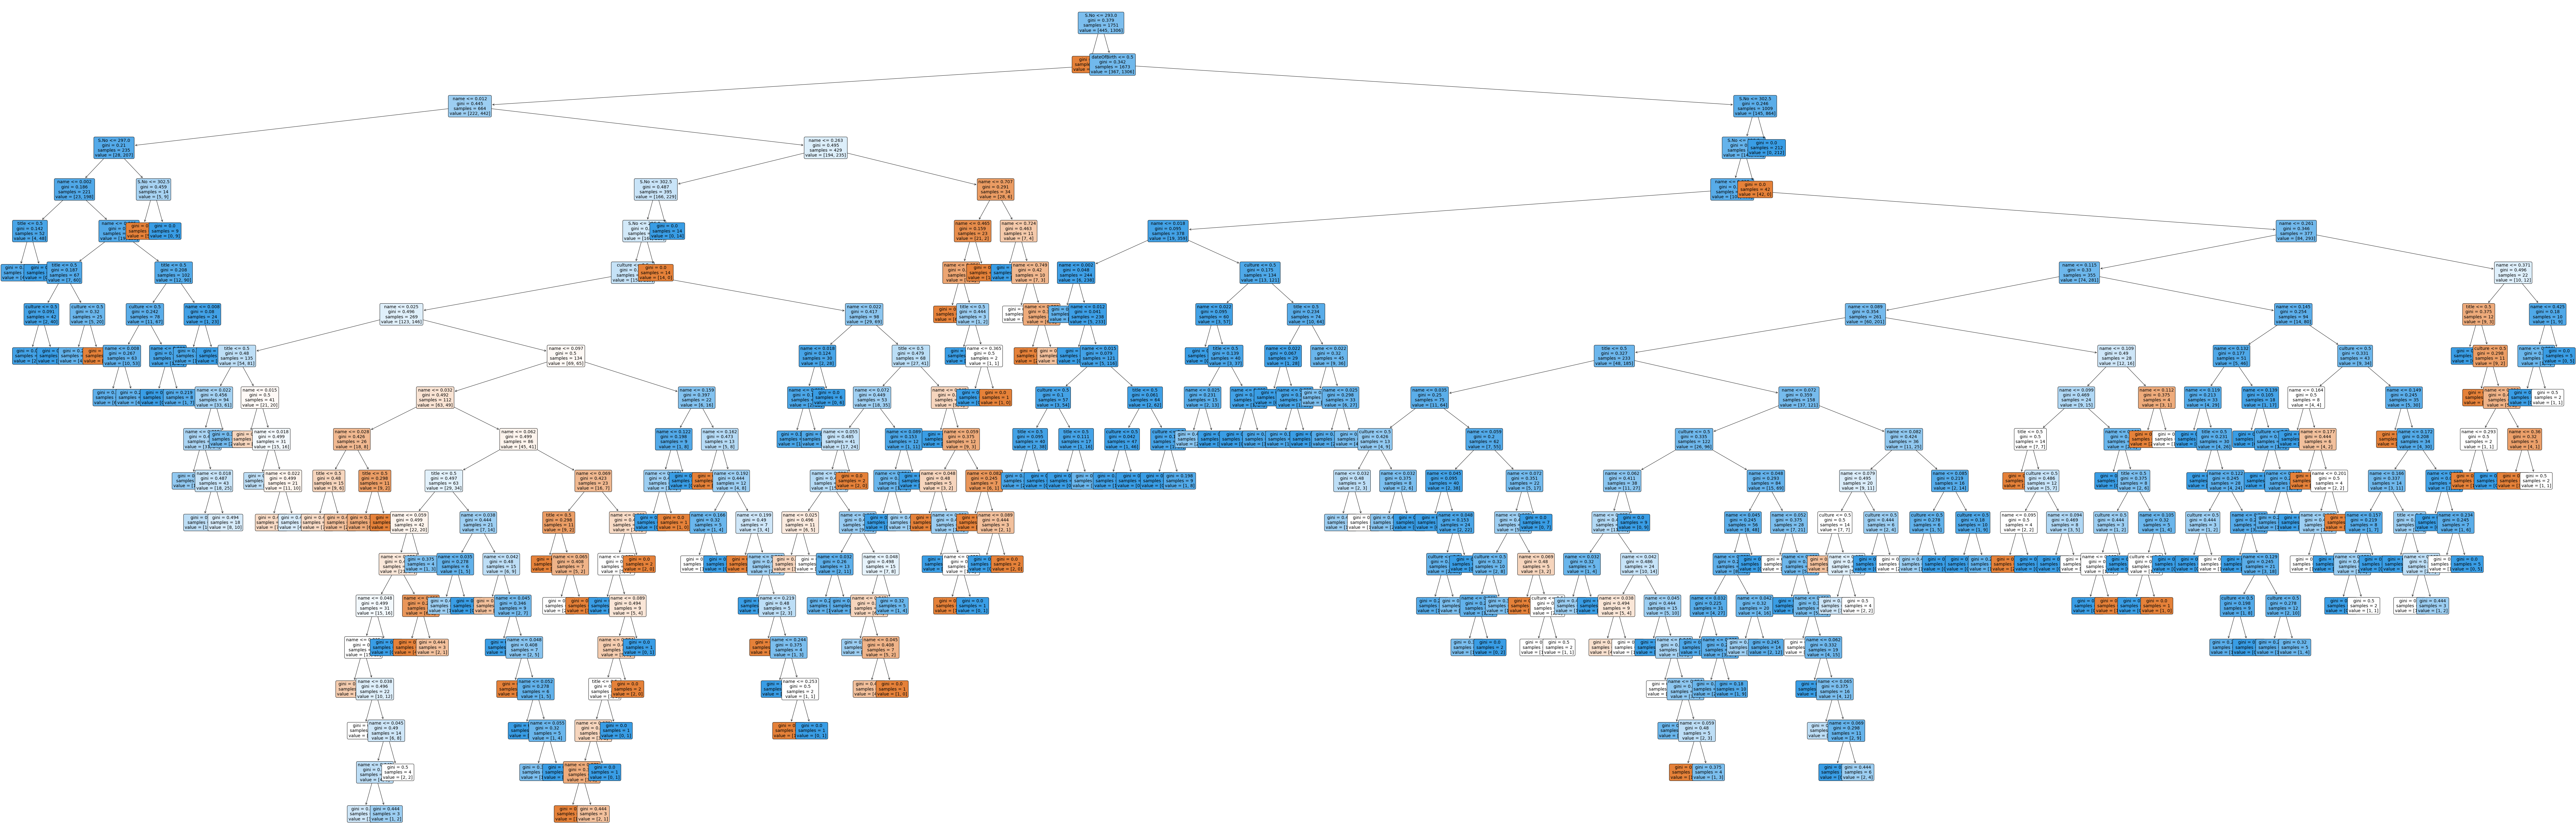

In [36]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [37]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.827
Testing  ACCURACY: 0.8513
AUC Score        : 0.71


In [38]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 0
True Positives : 145



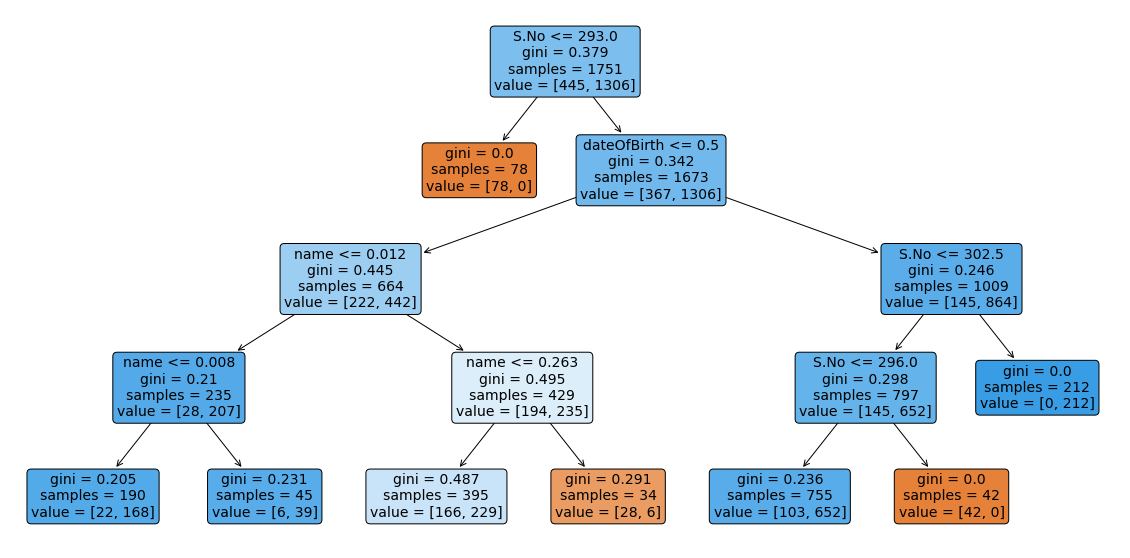

In [39]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

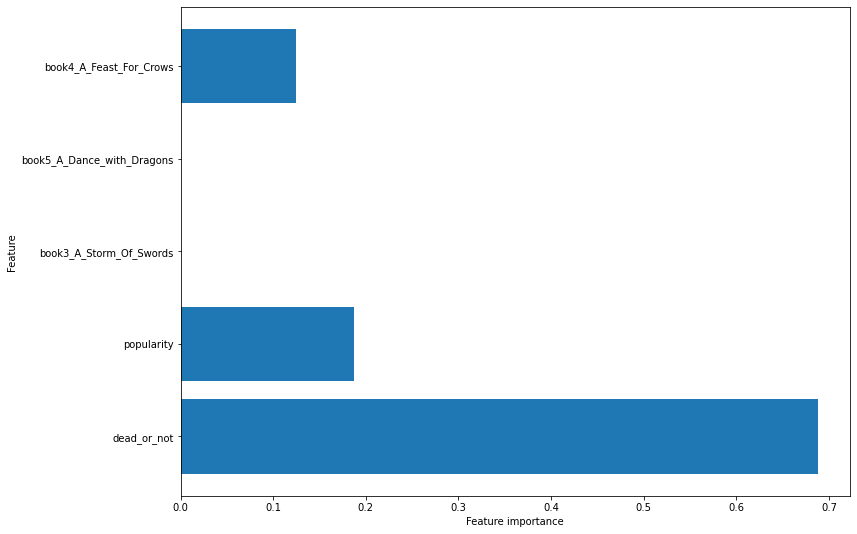

In [40]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [41]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__GOT_character_predictions.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6762         (19, 31, 4, 141)
Full Tree     0.7821           (32, 18, 11, 134)
Pruned Tree   0.71         (21, 29, 0, 145)



# KNN Model # 

In [42]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

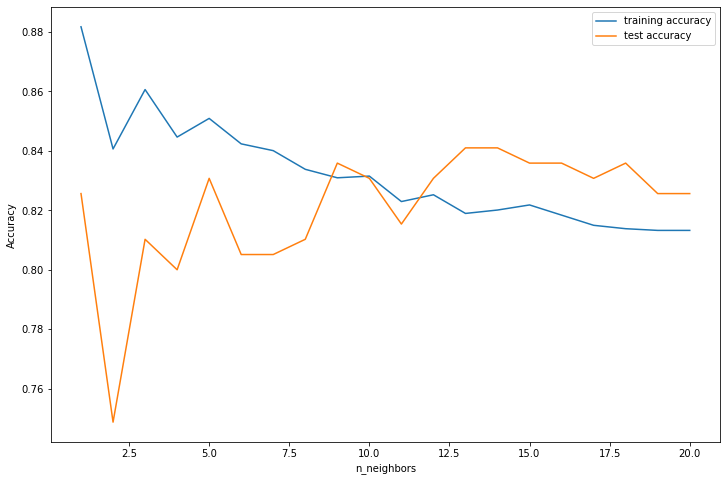

The optimal number of neighbors is: 13


In [43]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

In [44]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8184
Testing  ACCURACY: 0.8615
AUC Score        : 0.789


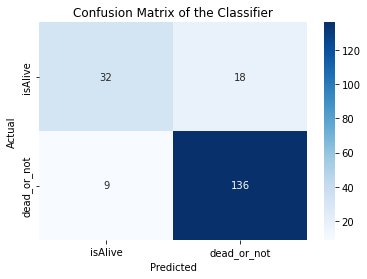

In [45]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['isAlive', 'dead_or_not'])

In [145]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 9
True Positives : 136



In [140]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6762


# Random Forest Model #

In [97]:
########################################
# importing packages
########################################
import numpy             as np  # mathematical essentials


# machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm




########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : ["dead_or_not", 'popularity', 'book3_A_Storm_Of_Swords',
                   'book5_A_Dance_with_Dragons', 'book4_A_Feast_For_Crows', 'age',
                   'gender_male', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones',
                   'gender_unknown', 'gender_female', 'isNoble', 'dateOfBirth', 
                  'S.No', 'popularity', 'numDeadRelations'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['dead_or_not' , 'popularity', 'book3_A_Storm_Of_Swords',
                   'book5_A_Dance_with_Dragons', 'book4_A_Feast_For_Crows'],
    
}


########################################
# checking previous model performances
########################################
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6762,0.7950,0.8205,"(19, 31, 4, 141)"
1,Full Tree,0.7821,0.8864,0.8513,"(32, 18, 11, 134)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.7200,0.8264,0.8564,"(22, 28, 0, 145)"
4,Tuned Random Forest (Full),0.8966,0.8601,0.9436,"(40, 10, 1, 144)"
5,GBM (Full),0.8190,0.8761,0.8769,"(35, 15, 9, 136)"
6,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"


In [98]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [99]:
# train/test split with the logit_sig variables
GOT_data   =  GOT.loc[ : , candidate_dict['logit_full'] ]
GOT_target =  GOT.loc[ : , 'isAlive' ]


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)

In [100]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [101]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8646
Testing  ACCURACY: 0.9128
AUC Score        : 0.8366


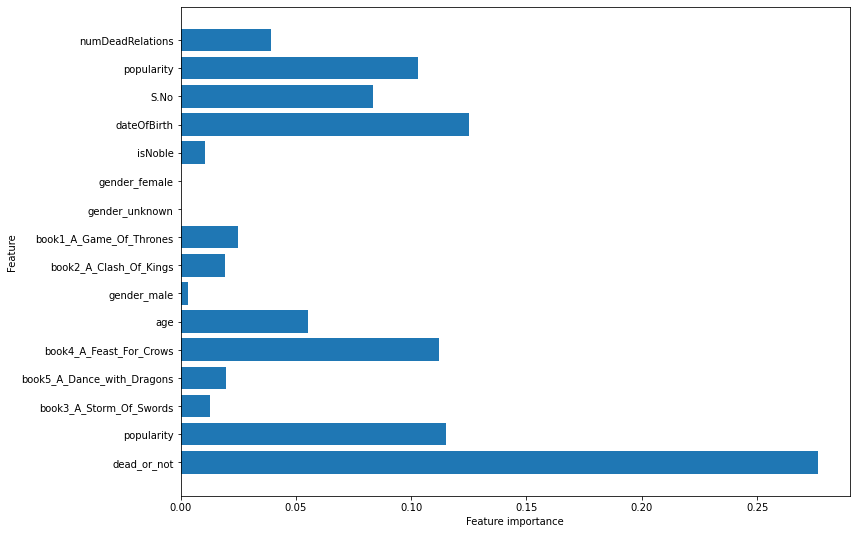

In [102]:
# plotting feature importances
plot_feature_importances(rf_default_fit, x_train, export = False)

In [103]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 1
True Positives : 144



In [104]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6762,0.7950,0.8205,"(19, 31, 4, 141)"
1,Full Tree,0.7821,0.8864,0.8513,"(32, 18, 11, 134)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.7200,0.8264,0.8564,"(22, 28, 0, 145)"
4,Tuned Random Forest (Full),0.8966,0.8601,0.9436,"(40, 10, 1, 144)"
5,GBM (Full),0.8190,0.8761,0.8769,"(35, 15, 9, 136)"
6,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"
7,Random Forest (Full),0.8366,0.8646,0.9128,"(34, 16, 1, 144)"


In [110]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Users/cindymoreno/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 11, 'criterion': 'entropy', 'bootstrap': False}
Tuned Training AUC: 0.5751


In [113]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_leaf=11, n_estimators=350, random_state=219,
                       warm_start=True)

In [114]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 11,
                                      n_estimators     = 350,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8601
Forest Tuned Testing  ACCURACY: 0.9436
Forest Tuned AUC Score        : 0.8966


In [115]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 40
False Positives: 10
False Negatives: 1
True Positives : 144



In [116]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6762,0.7950,0.8205,"(19, 31, 4, 141)"
1,Full Tree,0.7821,0.8864,0.8513,"(32, 18, 11, 134)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.7200,0.8264,0.8564,"(22, 28, 0, 145)"
4,Tuned Random Forest (Full),0.8966,0.8601,0.9436,"(40, 10, 1, 144)"
5,GBM (Full),0.8190,0.8761,0.8769,"(35, 15, 9, 136)"
6,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"
7,Random Forest (Full),0.8366,0.8646,0.9128,"(34, 16, 1, 144)"
8,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"
9,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"


# Gradient Boosted Model #

In [107]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.9966
Testing ACCURACY : 0.8718
AUC Score        : 0.8155


In [108]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 10
True Positives : 135



In [111]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)



# PREDICT step is not needed


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6762,0.7950,0.8205,"(19, 31, 4, 141)"
1,Full Tree,0.7821,0.8864,0.8513,"(32, 18, 11, 134)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Random Forest (Full),0.7200,0.8264,0.8564,"(22, 28, 0, 145)"
4,Tuned Random Forest (Full),0.8966,0.8601,0.9436,"(40, 10, 1, 144)"
5,GBM (Full),0.8190,0.8761,0.8769,"(35, 15, 9, 136)"
6,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"
7,Random Forest (Full),0.8366,0.8646,0.9128,"(34, 16, 1, 144)"
8,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"
9,GBM (Full),0.8155,0.9966,0.8718,"(35, 15, 10, 135)"


In [112]:
# declaring a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 8, 2)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 2.1}
Tuned Training AUC: 0.5555


In [117]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=2.1, max_depth=4, n_estimators=300,
                           random_state=219, warm_start=True)

In [119]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 200,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8686
Testing  ACCURACY: 0.9128
AUC Score        : 0.8628


In [120]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 5
True Positives : 140



In [131]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tuned_auc = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6762,0.7950,0.8205,"(19, 31, 4, 141)"
1,Full Tree,0.7721,0.8864,0.8462,"(31, 19, 11, 134)"
2,Pruned Tree,0.7100,0.8270,0.8513,"(21, 29, 0, 145)"
3,Tuned GBM,0.8628,0.8686,0.9128,"(38, 12, 5, 140)"
4,Tuned GBM,0.8628,0.8686,0.9128,"(38, 12, 5, 140)"


# Final Model #

In [146]:
# comparing results
print(f"""
Model                    AUC Score               TN, FP, FN, TP
-----                   ---------               --------------
Logistic             {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree            {full_tree_auc_score}      {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree          {pruned_tree_auc_score}    {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Tuned GBM            {gbm_tuned_auc}            {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}
GBM                  {gbm_auc}                  {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned Random Forest  {forest_tuned_auc}         {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
KNN.                 {knn_auc_score}            {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}
""")


Model                    AUC Score               TN, FP, FN, TP
-----                   ---------               --------------
Logistic             0.6762         (19, 31, 4, 141)
Full Tree            0.7721      (31, 19, 11, 134)
Pruned Tree          0.71    (21, 29, 0, 145)
Tuned GBM            0.8628            (38, 12, 5, 140)
GBM                  0.8628                  (35, 15, 10, 135)
Tuned Random Forest  0.8966         (40, 10, 1, 144)
KNN.                 0.789            (32, 18, 9, 136)

